In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ADITYA GARG/OneDrive/Desktop/Bengaluru_House_Data.csv") 
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1 = df.drop(['availability', 'society', 'balcony', 'area_type'], axis='columns') 
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
#Data cleaning
df1.isna().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df1 = df1.dropna() 
df1.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
missing_percentage = (df1.isnull().sum() / len(df1)) * 100

In [11]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\ADITYA GARG\AppData\Local\Temp\ipykernel_39404\2806435738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df1[df1.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_range_to_num(x): 
    tokens = x.split('-') 
    if (len(tokens) == 2):
       return(float(tokens[0])+float(tokens[1]))/2 
    try:
       return float(x)
    except:
       return None


In [22]:
df2 = df1.copy()
df2['total_sqft'] = df1['total_sqft'].apply(convert_range_to_num) 
df2.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [23]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [24]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']


In [25]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
len(df3.location.unique())

1304

In [27]:
#Cleaning - Removing leading space from location
df3['location'] = df3['location'].apply(lambda x: x.strip())


In [28]:
loc = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [30]:
# Features & Dimensionality Reduction Techniques
len(loc[loc<=10]) 
loc_less_than_10 = loc[loc<=10]


In [31]:
len(df3.location.unique())
df3.location = df3['location'].apply(lambda x: 'Other' if x in loc_less_than_10 else x)


In [32]:
len(df3.location.unique())

242

In [33]:
#Outlier Detection & Removal
df3.shape


(13246, 7)

In [34]:
df3[df3.total_sqft/df3.bhk <300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [35]:
df4 = df3[~(df3.total_sqft/df3.bhk <300)] 
df4.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       Other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 12502, dtype: object

In [36]:
df4.shape

(12502, 7)

In [37]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
#Function to remove price_per_sqft outlier
def remove_pps_outlier(df): 
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): 
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<=(m+st))] 
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
df5 = remove_pps_outlier(df4) 
df5.shape


(10241, 7)

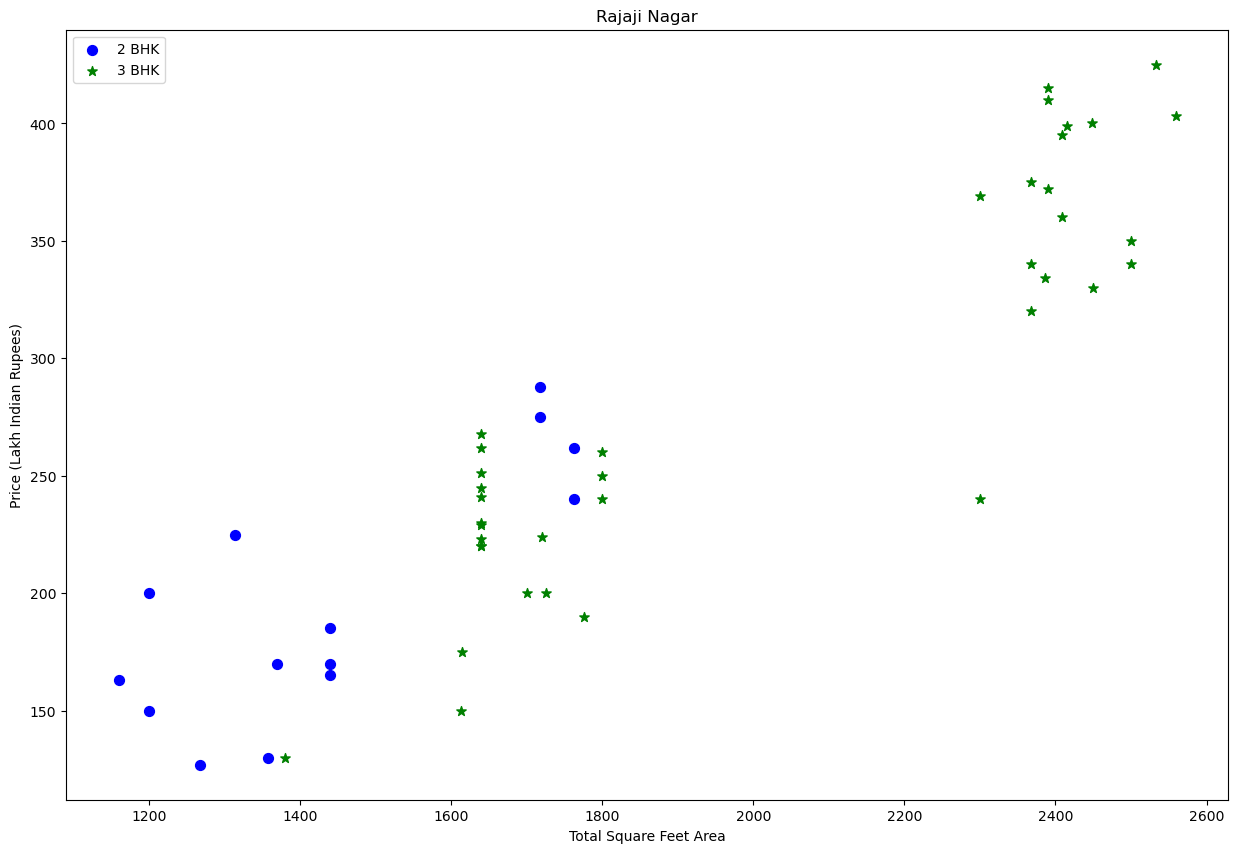

In [45]:
#Function to visualize prices between 2 & 3BHK
def plot_scatter_chart(df,location):
     bhk2 = df[(df.location==location) & (df.bhk==2)]
     bhk3 = df[(df.location==location) & (df.bhk==3)]
     plt.rcParams['figure.figsize'] = (15,10)
     plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50) 
     plt.scatter(bhk3.total_sqft,bhk3.price,marker='*', color='green',label='3 BHK', s=50) 
     plt.xlabel("Total Square Feet Area")
     plt.ylabel("Price (Lakh Indian Rupees)") 
     plt.title(location)
     plt.legend() 
plot_scatter_chart(df5,"Rajaji Nagar")


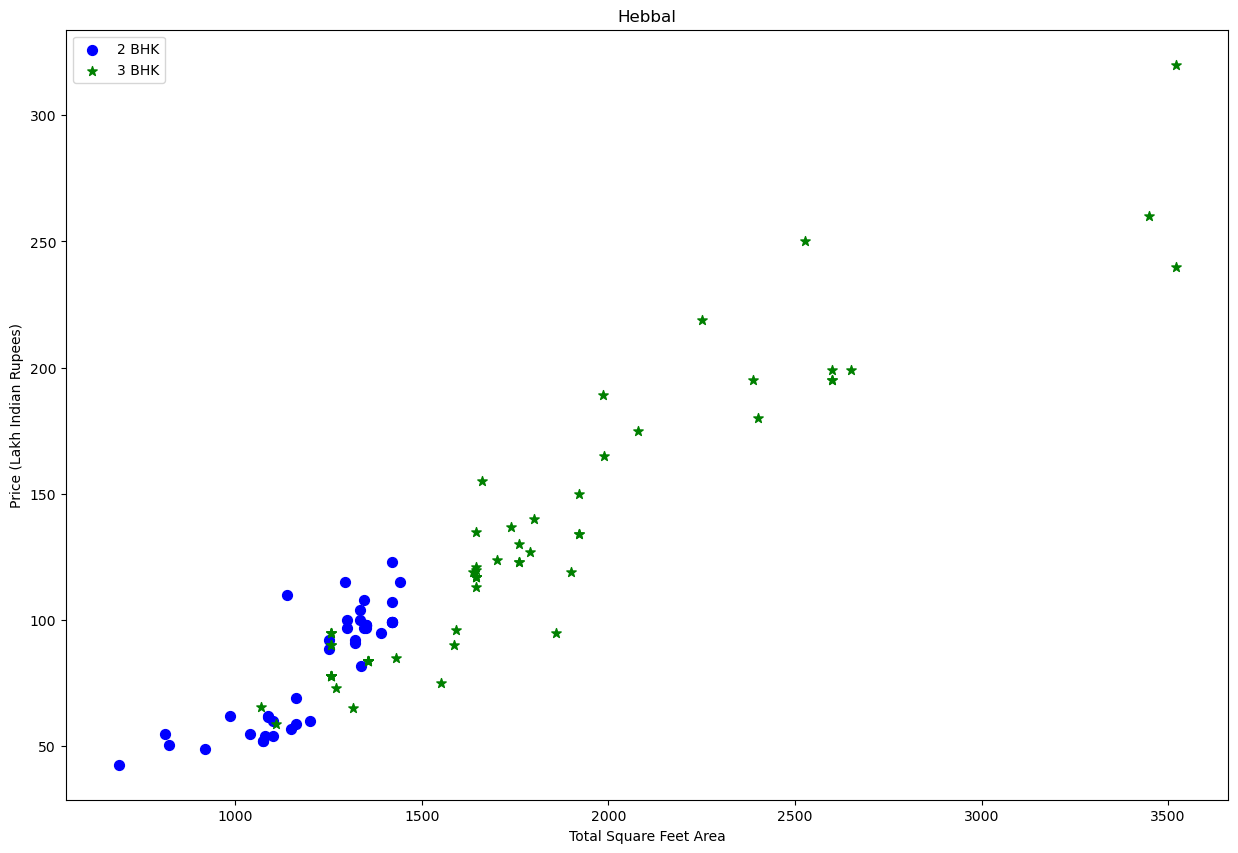

In [46]:
plot_scatter_chart(df5,"Hebbal")

In [48]:
#Function to remove such outliers
def remove_bhk_outliers(df): 
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): 
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'): 
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft), 
                'std': np.std(bhk_df.price_per_sqft), 
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'): 
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                  exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index') 
df6 = remove_bhk_outliers(df5)



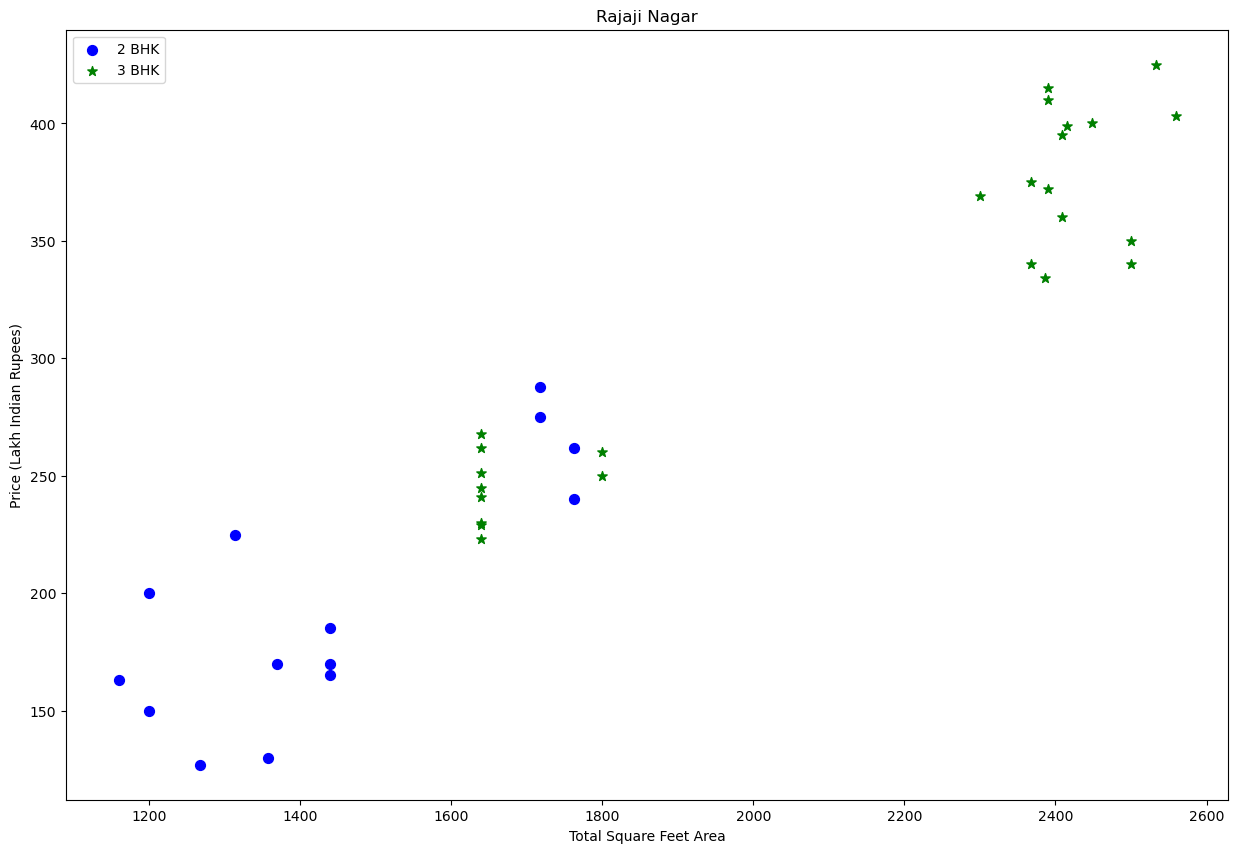

In [49]:
df6.shape 
plot_scatter_chart(df6,"Rajaji Nagar")

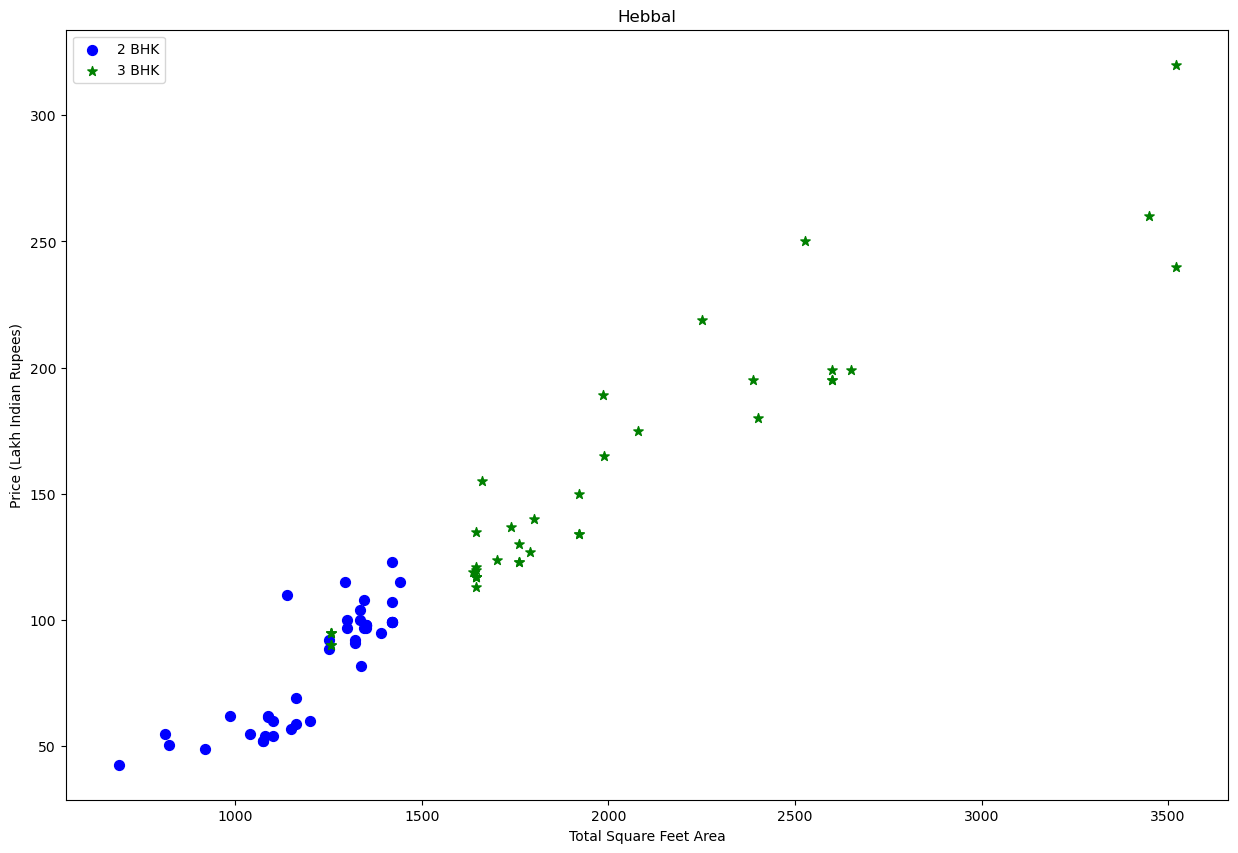

In [50]:
plot_scatter_chart(df6,"Hebbal")

Text(0, 0.5, 'Count')

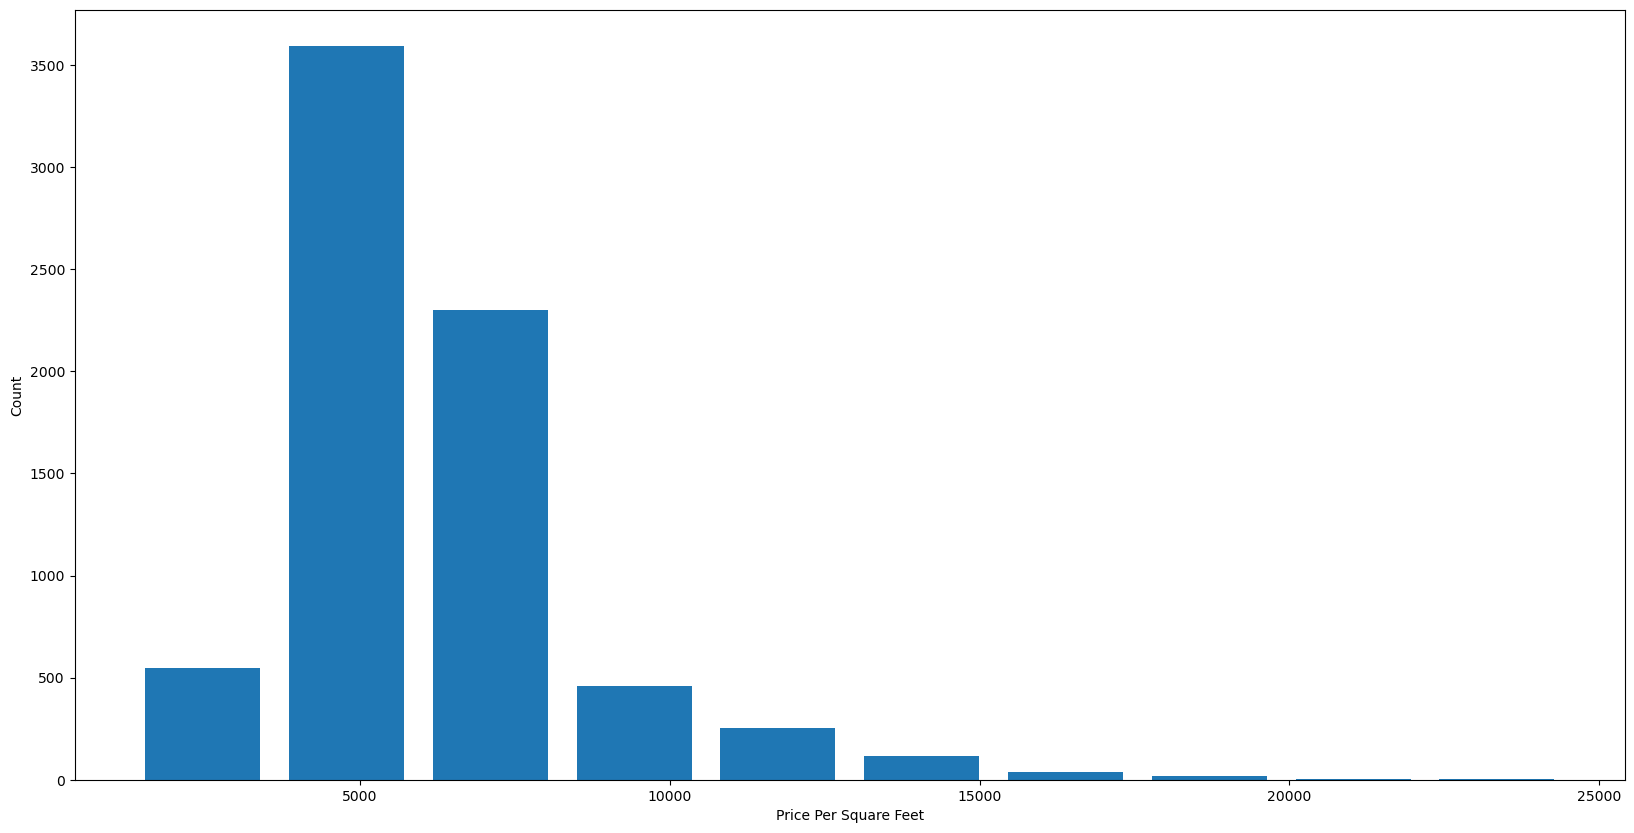

In [51]:
plt.rcParams["figure.figsize"] = (20,10) 
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [52]:
df6.bath.unique()
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5925,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6014,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6747,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7078,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [53]:
df6[df6.bath>df6.bhk+2]
df7 = df6[df6.bath<df6.bhk+2]


In [54]:
other_locations = df7[df7['location'] == 'Other']
# Print the other locations
print(other_locations)


     location       size  total_sqft  bath  price  bhk  price_per_sqft
5379    Other      3 BHK      2770.0   4.0  290.0    3    10469.314079
5382    Other      1 BHK       600.0   1.0   38.0    1     6333.333333
5385    Other      2 BHK      1500.0   2.0  185.0    2    12333.333333
5386    Other      2 BHK       840.0   2.0   45.0    2     5357.142857
5387    Other  3 Bedroom      4395.0   3.0  240.0    3     5460.750853
...       ...        ...         ...   ...    ...  ...             ...
7671    Other      2 BHK      1200.0   2.0   70.0    2     5833.333333
7672    Other      1 BHK      1800.0   1.0  200.0    1    11111.111111
7675    Other      2 BHK      1353.0   2.0  110.0    2     8130.081301
7676    Other  1 Bedroom       812.0   1.0   26.0    1     3201.970443
7679    Other      4 BHK      3600.0   5.0  400.0    4    11111.111111

[1134 rows x 7 columns]


In [55]:
df7.shape

(7251, 7)

In [56]:
d = pd.get_dummies(df7.location) 
d

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df8 = pd.concat([df7, d.drop('Other', axis = 1)], axis = 1) 
#df7 = pd.concat([df6, d.drop], axis = 'columns') 
df8.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.0,3,10169.491525,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df8.dtypes

location               object
size                   object
total_sqft            float64
bath                  float64
price                 float64
                       ...   
Yelachenahalli          uint8
Yelahanka               uint8
Yelahanka New Town      uint8
Yelenahalli             uint8
Yeshwanthpur            uint8
Length: 248, dtype: object

In [59]:
df9 = df8.drop(['price_per_sqft','location', 'size'],axis="columns")

In [60]:
#Applying ML Algorithms
X = df9.drop('price', axis = "columns") 
X.head()


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df9.price
#using test train split method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
#Creating Linear Regression model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression() 
lr_clf.fit(X_train,y_train) 
lr_clf.score(X_test,y_test)


0.8691914452174351

In [62]:
#Using K Fold cross validation to measure accuracy of LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 
cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

In [63]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : { 
            'model': LinearRegression(), 
            'params': {
                'fit_intercept': [True, False]
             }
         },
         'lasso': {
             'model': Lasso(), 
             'params': {
                 'alpha': [1,2],
                 'selection': ['random', 'cyclic']
            }
         },
         'decision_tree': {
            'model': DecisionTreeRegressor(), 
            'params': {
                'criterion' : ['squared_error','friedman_mse'], 
                'splitter': ['best','random']
             }
         }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False) 
        gs.fit(X,y)
        scores.append({
             'model': algo_name, 
             'best_score': gs.best_score_, 
             'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.853710,{'fit_intercept': False}
1,lasso,0.727550,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.717335,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [64]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [65]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [66]:
def predict_price(location,sqft,bath,bhk): 
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns)) 
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0: 
        x[loc_index] = 1

    return lr_clf.predict([x])[0] 
predict_price('1st Phase JP Nagar', 1000, 2, 2)


C:\Users\ADITYA GARG\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.81981031345501

In [67]:
predict_price('Indira Nagar', 1000, 2, 2)

C:\Users\ADITYA GARG\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.37066882807494

In [68]:
pip install -U notebook-as-pdf